# cluster_boGender


Cluster vs. Gender Proportions (Normalized):
Gender     Female      Male  Not Provided
Cluster                                  
0        0.442401  0.223032      0.334566
1        0.248017  0.361026      0.390957
2        0.301543  0.460385      0.238072

Homogeneity Score (0 = no alignment, 1 = perfect alignment): 0.0271


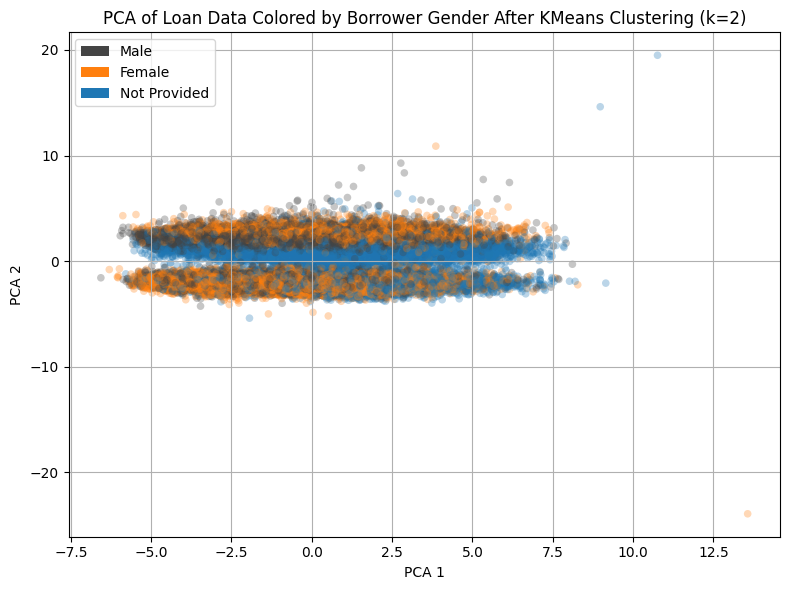

In [20]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import homogeneity_score
from matplotlib.patches import Patch

df = pd.read_csv('../Data/Cleaned_data_Inflation_Adjusted_.csv')
min_count = df['BoGender'].value_counts().min()
df = df.groupby('BoGender').sample(n=min_count, random_state=42)
df = df.reset_index(drop=True)

# Shuffle rows for fair plotting
df_shuffled = df.sample(frac=1, random_state=42).reset_index(drop=True)

# Keep BoGender as-is: 1=Male, 2=Female, 3=Not Provided
gender_numeric = df_shuffled['BoGender']
features = df_shuffled.drop(columns=['BoGender'])

# Standardize features
scaler = StandardScaler()
scaled_features = scaler.fit_transform(features)

# Apply KMeans clustering
kmeans = KMeans(n_clusters=3, random_state=42)
clusters = kmeans.fit_predict(scaled_features)

# Add cluster and gender labels
df_shuffled['Cluster'] = clusters
df_shuffled['Gender'] = gender_numeric.map({
    1: 'Male',
    2: 'Female',
    3: 'Not Provided'
})

# Crosstab: Cluster vs Gender
print("\nCluster vs. Gender Proportions (Normalized):")
crosstab = pd.crosstab(df_shuffled['Cluster'], df_shuffled['Gender'], normalize='index')
print(crosstab)

# Homogeneity Score
hom_score = homogeneity_score(gender_numeric, clusters)
print(f"\nHomogeneity Score (0 = no alignment, 1 = perfect alignment): {hom_score:.4f}")

# PCA
pca = PCA(n_components=2)
pca_result = pca.fit_transform(scaled_features)

gender_color = gender_numeric.map({
    1: '#444444',    # Male = dark gray
    2: '#ff7f0e',    # Female = orange
    3: '#1f77b4'     # Not Provided = blue
})

plt.figure(figsize=(8, 6))
plt.scatter(pca_result[:, 0], pca_result[:, 1],
            c=gender_color, alpha=0.3, s=30, edgecolors='none')

legend_elements = [
    Patch(facecolor='#444444', label='Male'),
    Patch(facecolor='#ff7f0e', label='Female'),
    Patch(facecolor='#1f77b4', label='Not Provided')
]
plt.legend(handles=legend_elements)

plt.title("PCA of Loan Data Colored by Borrower Gender After KMeans Clustering (k=2)")
plt.xlabel("PCA 1")
plt.ylabel("PCA 2")
plt.grid(True)
plt.tight_layout()
plt.savefig("BoGender_pca.png", format='png', dpi=300)
plt.show()


# cluster_boRace


Cluster vs. Borrower Race Proportions (Normalized):
Race     American Indian or Alaska Native     Asian  \
Cluster                                               
0                                0.034231  0.354603   
1                                0.265581  0.124646   
2                                0.240317  0.126661   
3                                0.151657  0.165964   
4                                0.160375  0.121262   

Race     Black or African American  Information Not Provided  Not Applicable  \
Cluster                                                                        
0                         0.149551                  0.198072        0.202060   
1                         0.191926                  0.000000        0.216360   
2                         0.092169                  0.000000        0.257846   
3                         0.239759                  0.210693        0.109337   
4                         0.130172                  0.268348        0.138176   



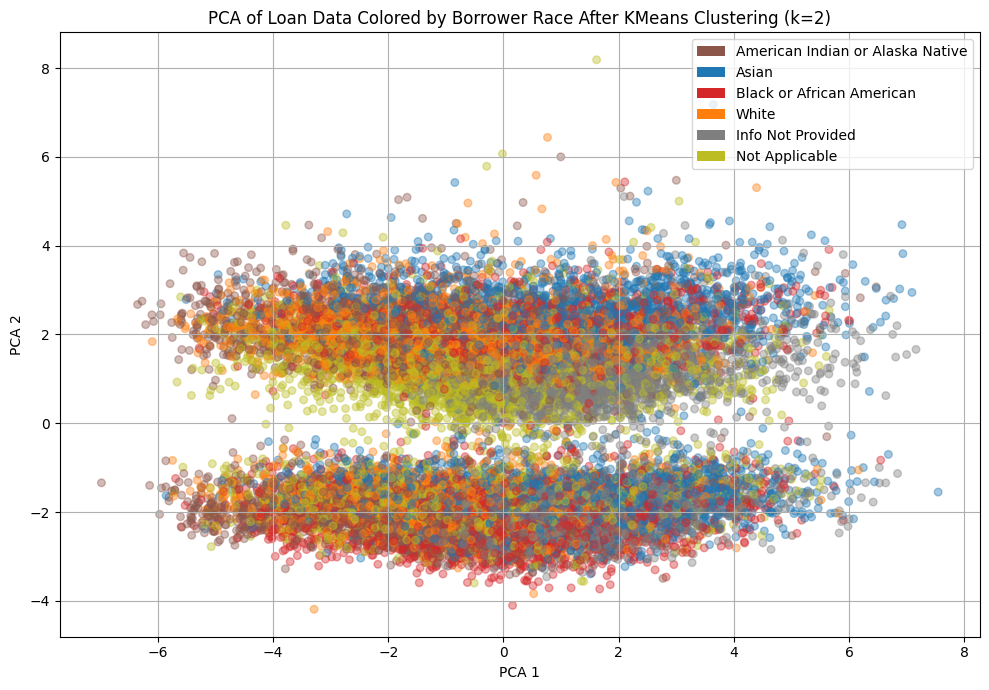

In [25]:
import pandas as pd  
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import homogeneity_score
from matplotlib.patches import Patch

df = pd.read_csv('../Data/Cleaned_data_Inflation_Adjusted_.csv')
df = df[df['BoRace'] != 4]
min_count = df['BoRace'].value_counts().min()
df = df.groupby('BoRace').sample(n=min_count, random_state=42)
df = df.reset_index(drop=True)

# Shuffle rows
df_shuffled = df.sample(frac=1, random_state=42).reset_index(drop=True)

# Extract BoRace for coloring
race_numeric = df_shuffled['BoRace']
features = df_shuffled.drop(columns=['BoRace'])

# Standardize features
scaler = StandardScaler()
scaled_features = scaler.fit_transform(features)

# KMeans clustering
kmeans = KMeans(n_clusters=5, random_state=42)
clusters = kmeans.fit_predict(scaled_features)

# Add labels
df_shuffled['Cluster'] = clusters
df_shuffled['Race'] = race_numeric.map({
    1: 'American Indian or Alaska Native',
    2: 'Asian',
    3: 'Black or African American',
    # 4: 'Native Hawaiian or Pacific Islander',
    5: 'White',
    6: 'Information Not Provided',
    7: 'Not Applicable'
})

# Crosstab: Cluster vs BoRace
print("\nCluster vs. Borrower Race Proportions (Normalized):")
crosstab = pd.crosstab(df_shuffled['Cluster'], df_shuffled['Race'], normalize='index')
print(crosstab)

# Homogeneity Score
hom_score = homogeneity_score(race_numeric, clusters)
print(f"\nHomogeneity Score (0 = no alignment, 1 = perfect alignment): {hom_score:.4f}")

# PCA
pca = PCA(n_components=5)
pca_result = pca.fit_transform(scaled_features)

# Define race colors
race_color = race_numeric.map({
    1: '#8c564b',  # Brown - American Indian
    2: '#1f77b4',  # Blue - Asian
    3: '#d62728',  # Red - Black
    # 4: '#2ca02c',  # Green - Pacific Islander
    5: '#ff7f0e',  # Orange - White
    6: '#7f7f7f',  # Gray - Info not provided
    7: '#bcbd22'   # Olive - Not applicable
})

# Plot PCA
plt.figure(figsize=(10, 7))
plt.scatter(pca_result[:, 0], pca_result[:, 1],
            c=race_color, alpha=0.4, s=30)

# Add legend inside the plot
legend_elements = [
    Patch(facecolor='#8c564b', label='American Indian or Alaska Native'),
    Patch(facecolor='#1f77b4', label='Asian'),
    Patch(facecolor='#d62728', label='Black or African American'),
    # Patch(facecolor='#2ca02c', label='Native Hawaiian or Pacific Islander'),
    Patch(facecolor='#ff7f0e', label='White'),
    Patch(facecolor='#7f7f7f', label='Info Not Provided'),
    Patch(facecolor='#bcbd22', label='Not Applicable')
]
plt.legend(handles=legend_elements, loc='upper right', frameon=True)


plt.title("PCA of Loan Data Colored by Borrower Race After KMeans Clustering (k=2)")
plt.xlabel("PCA 1")
plt.ylabel("PCA 2")
plt.grid(True)
plt.tight_layout()
plt.savefig("BoRace_pca.png", format='png', dpi=300)
plt.show()


# cluster_coGender


Cluster vs. Co-Borrower Gender Proportions (Normalized):
Gender     Female      Male  No Co-Borrower  Not Provided
Cluster                                                  
0        0.349246  0.208779        0.281975      0.160000
1        0.157439  0.255970        0.138022      0.448570
2        0.235827  0.273527        0.290062      0.200584

Homogeneity Score (0 = no alignment, 1 = perfect alignment): 0.0324


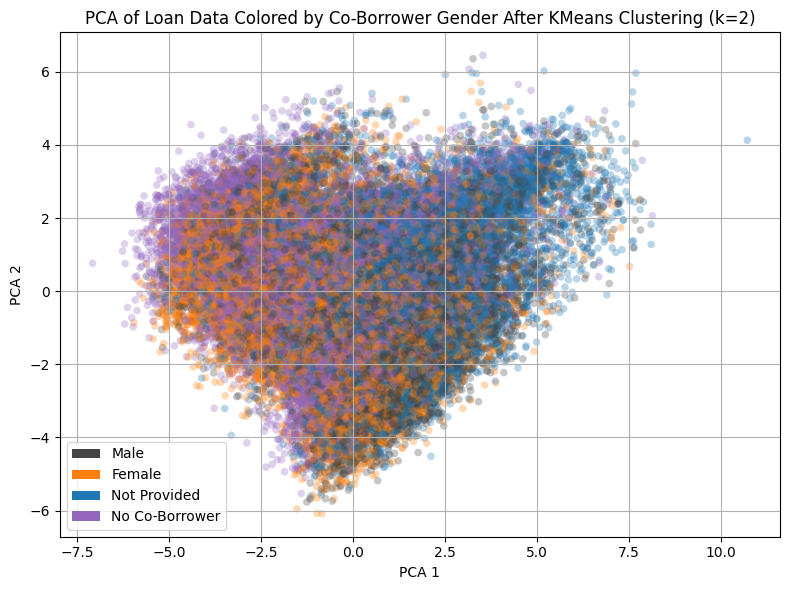

In [22]:
import pandas as pd 
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import homogeneity_score
from matplotlib.patches import Patch

df = pd.read_csv('../Data/Cleaned_data_Inflation_Adjusted_.csv')
min_count = df['CoGender'].value_counts().min()
df = df.groupby('CoGender').sample(n=min_count, random_state=42)
df = df.reset_index(drop=True)

# Shuffle rows for fair plotting
df_shuffled = df.sample(frac=1, random_state=42).reset_index(drop=True)

# Use CoGender instead of BoGender
gender_numeric = df_shuffled['CoGender']
features = df_shuffled.drop(columns=['CoGender'])

# Standardize features
scaler = StandardScaler()
scaled_features = scaler.fit_transform(features)

# Apply KMeans clustering
kmeans = KMeans(n_clusters=3, random_state=42)
clusters = kmeans.fit_predict(scaled_features)

# Add cluster and gender labels
df_shuffled['Cluster'] = clusters
df_shuffled['Gender'] = gender_numeric.map({
    1: 'Male',
    2: 'Female',
    3: 'Not Provided',
    4: 'No Co-Borrower'
})

# Crosstab: Cluster vs Co-Gender
print("\nCluster vs. Co-Borrower Gender Proportions (Normalized):")
crosstab = pd.crosstab(df_shuffled['Cluster'], df_shuffled['Gender'], normalize='index')
print(crosstab)

# Homogeneity Score
hom_score = homogeneity_score(gender_numeric, clusters)
print(f"\nHomogeneity Score (0 = no alignment, 1 = perfect alignment): {hom_score:.4f}")

# PCA
pca = PCA(n_components=2)
pca_result = pca.fit_transform(scaled_features)

# Updated color map: softer gray for No Co-Borrower
gender_color = gender_numeric.map({
    1: '#444444',    # Male = dark gray
    2: '#ff7f0e',    # Female = orange
    3: '#1f77b4',    # Not Provided = blue
    4: '#9467bd'     # No Co-Borrower = light gray
})

# Create figure
plt.figure(figsize=(8, 6))
plt.scatter(pca_result[:, 0], pca_result[:, 1],
            c=gender_color, alpha=0.3, s=30, edgecolors='none')

# Add legend
legend_elements = [
    Patch(facecolor='#444444', label='Male'),
    Patch(facecolor='#ff7f0e', label='Female'),
    Patch(facecolor='#1f77b4', label='Not Provided'),
    Patch(facecolor='#9467bd', label='No Co-Borrower')
]
plt.legend(handles=legend_elements)

plt.title("PCA of Loan Data Colored by Co-Borrower Gender After KMeans Clustering (k=2)")
plt.xlabel("PCA 1")
plt.ylabel("PCA 2")
plt.grid(True)
plt.tight_layout()
plt.savefig("CoGender_pca.png", format='png', dpi=300)
plt.show()


# cluster_coRace


Cluster vs. Co-Borrower Race Proportions (Normalized):
Race     American Indian or Alaska Native     Asian  \
Cluster                                               
0                                0.000000  0.000000   
1                                0.186168  0.158879   
2                                0.159558  0.089521   
3                                0.056825  0.285361   
4                                0.230807  0.151118   

Race     Black or African American  Information Not Provided  No Co-Borrower  \
Cluster                                                                        
0                         0.000000                  0.000000        1.000000   
1                         0.208224                  0.160000        0.000000   
2                         0.135334                  0.331227        0.001580   
3                         0.183447                  0.192094        0.024707   
4                         0.124879                  0.000000        0.000000  

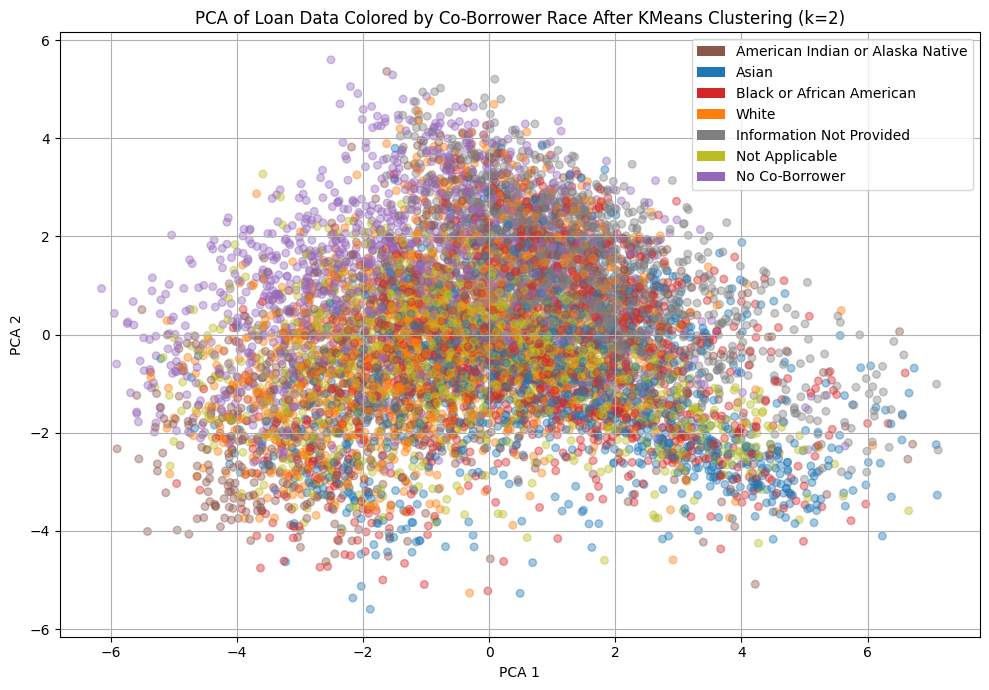

In [24]:
import pandas as pd  
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import homogeneity_score
from matplotlib.patches import Patch

df = pd.read_csv('../Data/Cleaned_data_Inflation_Adjusted_.csv')
df = df[df['CoRace'] != 4]
min_count = df['CoRace'].value_counts().min()
df = df.groupby('CoRace').sample(n=min_count, random_state=42)
df = df.reset_index(drop=True)

# Shuffle rows
df_shuffled = df.sample(frac=1, random_state=42).reset_index(drop=True)

# Extract CoRace for coloring
race_numeric = df_shuffled['CoRace']
features = df_shuffled.drop(columns=['CoRace'])

# Standardize features
scaler = StandardScaler()
scaled_features = scaler.fit_transform(features)

# KMeans clustering
kmeans = KMeans(n_clusters=5, random_state=42)
clusters = kmeans.fit_predict(scaled_features)

# Add cluster and CoRace label
df_shuffled['Cluster'] = clusters
df_shuffled['Race'] = race_numeric.map({
    1: 'American Indian or Alaska Native',
    2: 'Asian',
    3: 'Black or African American',
    # 4: 'Native Hawaiian or Pacific Islander',
    5: 'White',
    6: 'Information Not Provided',
    7: 'Not Applicable',
    8: 'No Co-Borrower'
})

# Crosstab: Cluster vs CoRace
print("\nCluster vs. Co-Borrower Race Proportions (Normalized):")
crosstab = pd.crosstab(df_shuffled['Cluster'], df_shuffled['Race'], normalize='index')
print(crosstab)

# Homogeneity Score
hom_score = homogeneity_score(race_numeric, clusters)
print(f"\nHomogeneity Score (0 = no alignment, 1 = perfect alignment): {hom_score:.4f}")

# PCA
pca = PCA(n_components=2)
pca_result = pca.fit_transform(scaled_features)

# Define colors for each CoRace group
race_color = race_numeric.map({
    1: '#8c564b',  # Brown - American Indian
    2: '#1f77b4',  # Blue - Asian
    3: '#d62728',  # Red - Black
    # 4: '#2ca02c',  # Green - Pacific Islander
    5: '#ff7f0e',  # Orange - White
    6: '#7f7f7f',  # Gray - Info not provided
    7: '#bcbd22',  # Olive - Not applicable
    8: '#9467bd'   # Purple - No Co-Borrower
})

# Plot PCA result
plt.figure(figsize=(10, 7))
plt.scatter(pca_result[:, 0], pca_result[:, 1],
            c=race_color, alpha=0.4, s=30)

# Legend inside plot
legend_elements = [
    Patch(facecolor='#8c564b', label='American Indian or Alaska Native'),
    Patch(facecolor='#1f77b4', label='Asian'),
    Patch(facecolor='#d62728', label='Black or African American'),
    # Patch(facecolor='#2ca02c', label='Native Hawaiian or Pacific Islander'),
    Patch(facecolor='#ff7f0e', label='White'),
    Patch(facecolor='#7f7f7f', label='Information Not Provided'),
    Patch(facecolor='#bcbd22', label='Not Applicable'),
    Patch(facecolor='#9467bd', label='No Co-Borrower')
]
plt.legend(handles=legend_elements, loc='upper right', frameon=True)

plt.title("PCA of Loan Data Colored by Co-Borrower Race After KMeans Clustering (k=2)")
plt.xlabel("PCA 1")
plt.ylabel("PCA 2")
plt.grid(True)
plt.tight_layout()
plt.savefig("CoRace_pca.png", format='png', dpi=300)
plt.show()
